# Classifying Depression

The National Institute of Mental Health describes depression as a “serious mood disorder”. Access to mental health services is challenging for people living in rural areas and they may not have the support they need. This may be due to their economic state, lack of education about these services, living at a distance from the services or friends and family, etc. The lack of access to mental health services may lead to increased rates of depression in people living in these areas.

In this project, we will be creating a classification model to predict whether or not someone is likely to be depressed, based on their sex, age, whether or not they’re married, the number of children they have, total family members, how much money they make, and their expenses.

For our project we extracted our data from [*Kaggle*](https://www.kaggle.com/datasets/diegobabativa/depression). The data comes from a study that was conducted on people living in rural areas.

# Preliminary exploratory data analysis

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
# Reading and cleaning the data
depression_data <- read_csv("https://raw.githubusercontent.com/DonaldKLee/DSCI-100-Group-Project/main/data/b_depressed.csv") |>
    mutate(
        depression_result = as_factor(ifelse(depressed>0, "depressed", "not depressed")),
        assets=(gained_asset+durable_asset+save_asset)/1000000,
        expenses=(living_expenses+other_expenses+farm_expenses)/10000000) |>
    select(sex, Age, Married, Number_children, total_members, assets, expenses, depression_result)

depression_data

Rows: 1429 Columns: 23
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (23): Survey_id, Ville_id, sex, Age, Married, Number_children, education...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


sex,Age,Married,Number_children,total_members,assets,expenses,depression_result
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,28,1,4,5,75.17412,8.625878,not depressed
1,23,1,3,5,75.17412,8.625878,depressed
1,22,1,3,5,75.17412,8.625878,not depressed
1,27,1,2,4,122.01366,6.319131,not depressed
0,59,0,4,6,123.35892,17.611213,not depressed
1,35,1,6,8,60.07415,6.113423,not depressed
0,34,0,1,3,86.62816,9.986473,depressed
1,21,1,2,4,80.38325,17.551288,not depressed
1,32,1,7,9,116.38863,12.608545,not depressed


## Summary of the training data

In [3]:
set.seed(2000)

depression_data_split <- initial_split(depression_data, prop=0.75, strata = depression_result)
depression_train <- training(depression_data_split)

depression_data_summary <- depression_train |>
    group_by(depression_result) |>
    summarize(mean_sex = round(mean(sex, na.rm = TRUE)), 
              mean_age = mean(Age, na.rm = TRUE), 
              mean_married = round(mean(Married, na.rm = TRUE)),
              mean_number_children = round(mean(Number_children, na.rm = TRUE)),
              mean_total_members = round(mean(total_members, na.rm = TRUE)),
              mean_assets = mean(assets, na.rm = TRUE),
              mean_expenses = mean(expenses, na.rm = TRUE),
              n=n())
    
depression_data_summary

depression_result,mean_sex,mean_age,mean_married,mean_number_children,mean_total_members,mean_assets,mean_expenses,n
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
not depressed,1,33.95633,1,3,5,88.03465,10.04336,893
depressed,1,38.09551,1,3,5,88.95443,10.03475,178


## Data Visualization

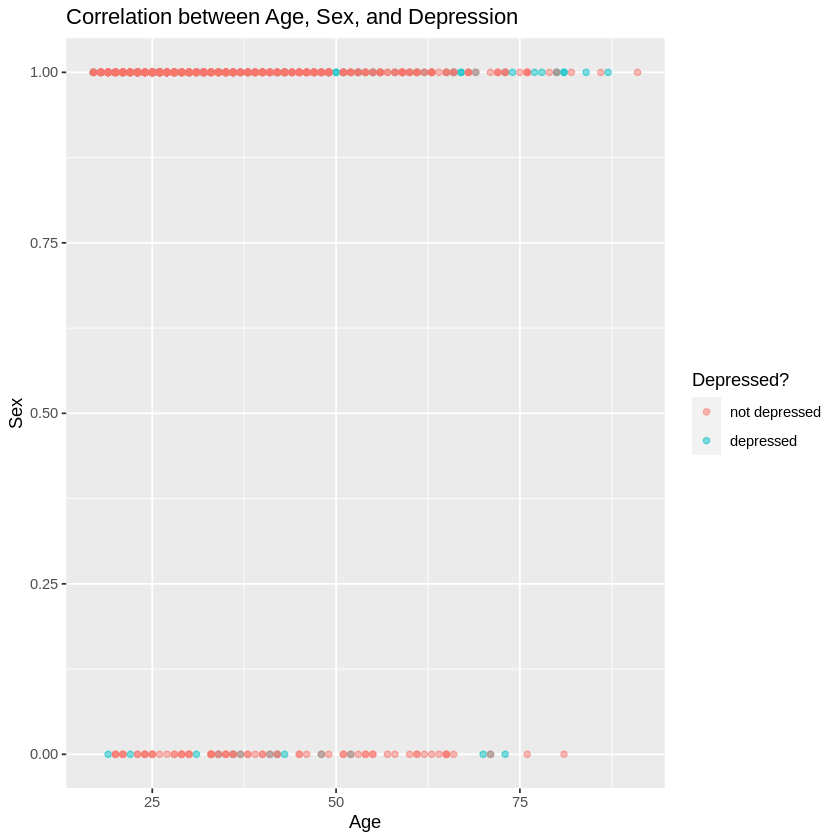

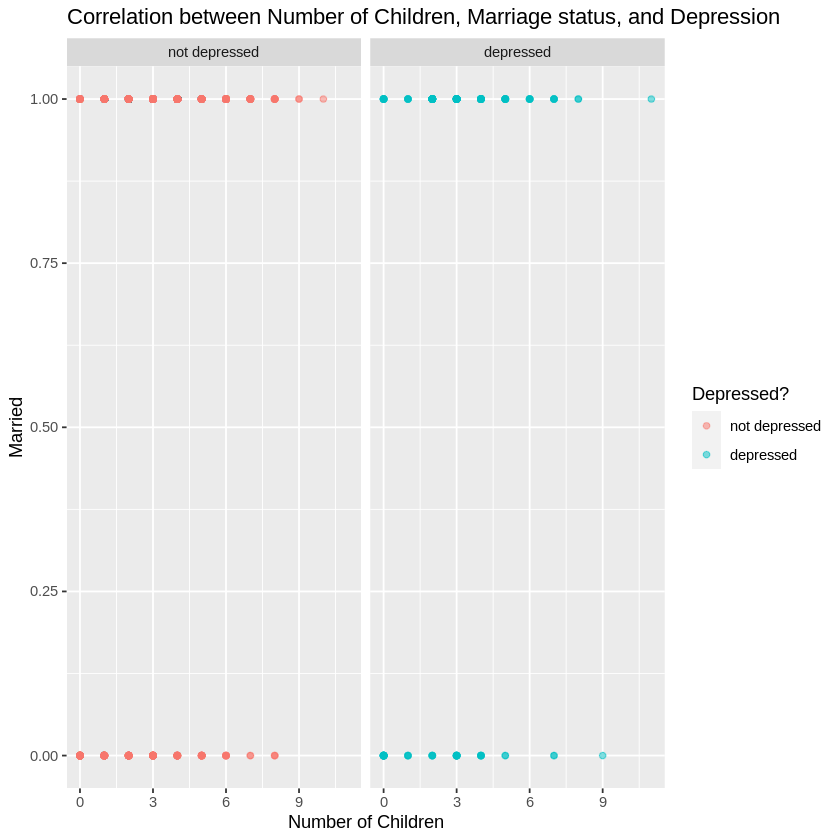

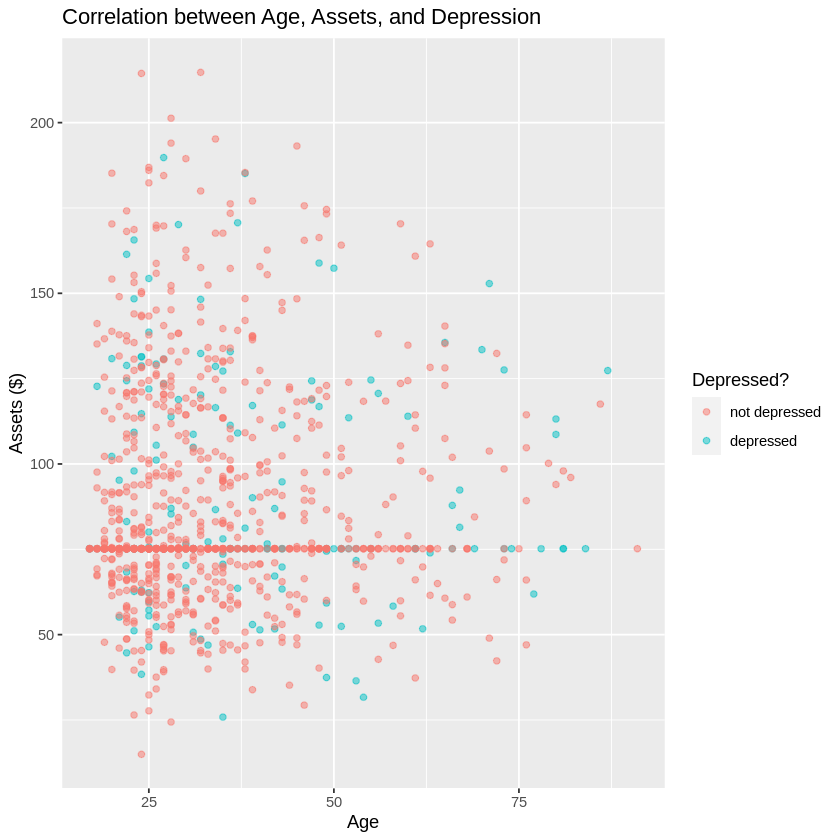

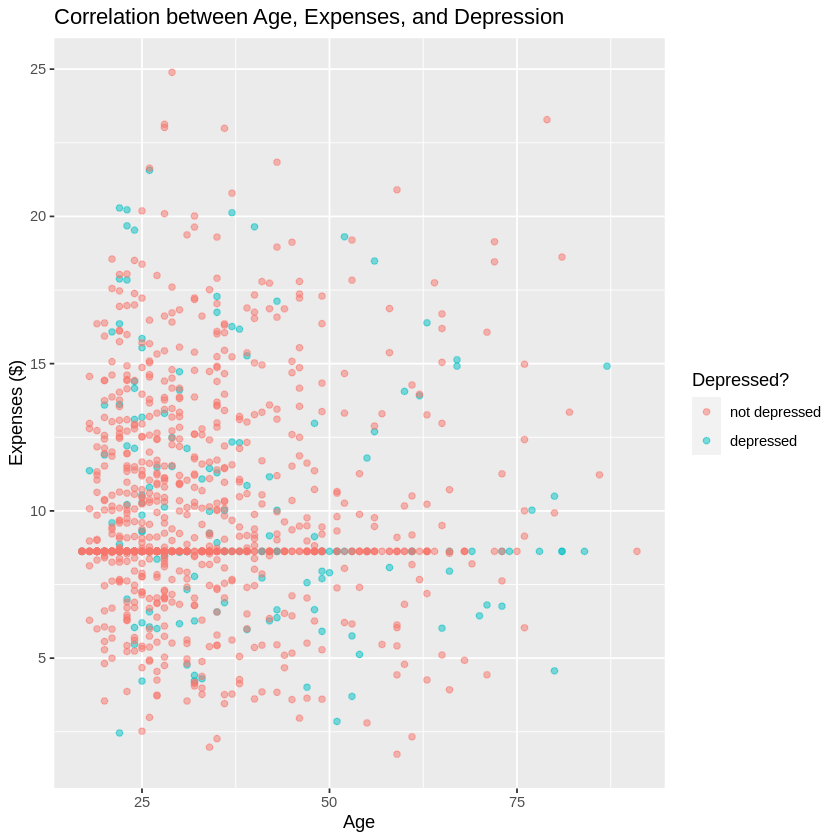

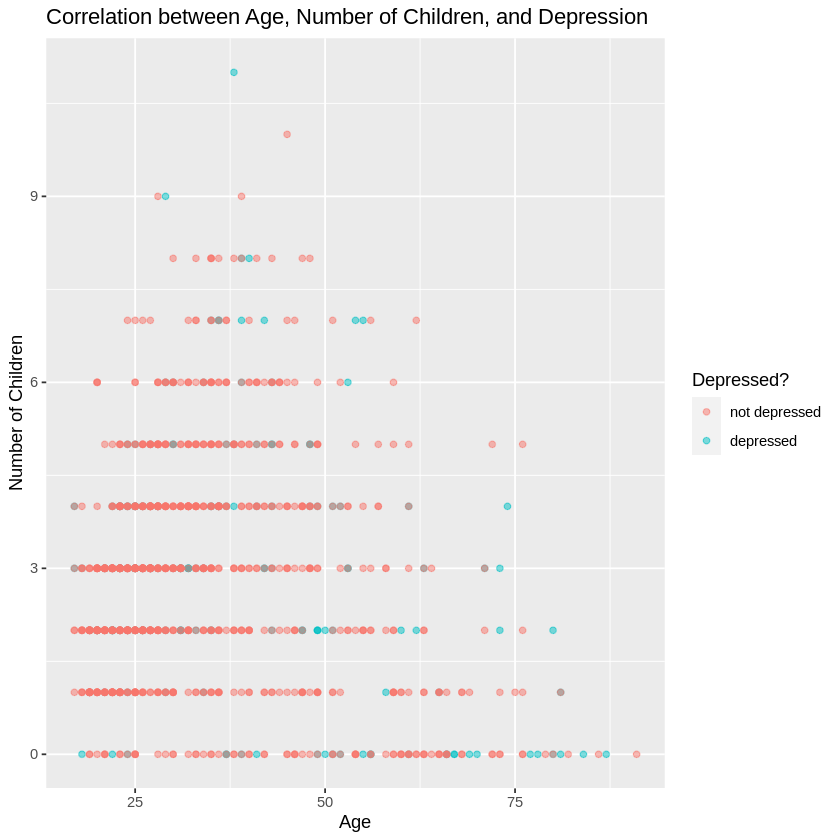

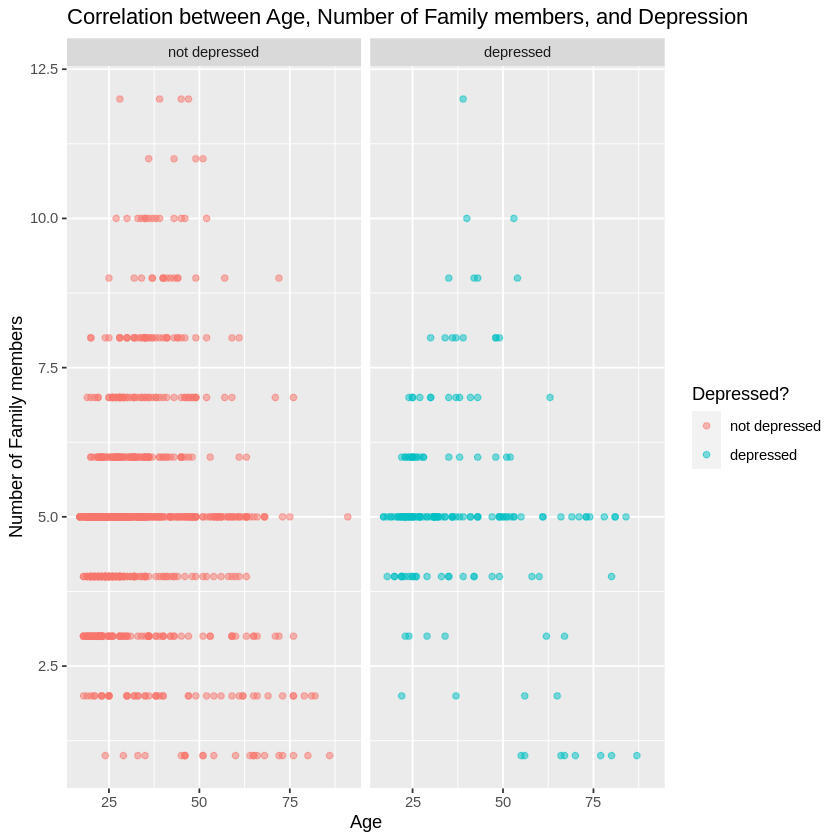

In [4]:
depression_data_plot1 <- depression_train |>
    ggplot(aes(x=Age, y=sex)) +
    geom_point(aes(color=depression_result), alpha = 0.5) +
    labs(x="Age", y="Sex", color="Depressed?") +
    ggtitle("Correlation between Age, Sex, and Depression")
depression_data_plot1

depression_data_plot2 <- depression_train |>
    ggplot(aes(x=Number_children, y=Married)) +
    geom_point(aes(color=depression_result), alpha = 0.5) +
    facet_grid(cols = vars(depression_result)) +
    labs(x="Number of Children", y="Married", color="Depressed?") +
    ggtitle("Correlation between Number of Children, Marriage status, and Depression")
depression_data_plot2


depression_data_plot3 <- depression_train |>
    ggplot(aes(x=Age, y=assets)) +
    geom_point(aes(color=depression_result), alpha = 0.5) +
    labs(x="Age", y="Assets ($)", color="Depressed?") +
    ggtitle("Correlation between Age, Assets, and Depression")
depression_data_plot3

depression_data_plot4 <- depression_train |>
    ggplot(aes(x=Age, y=expenses)) +
    geom_point(aes(color=depression_result), alpha = 0.5) +
    labs(x="Age", y="Expenses ($)", color="Depressed?") +
    ggtitle("Correlation between Age, Expenses, and Depression")
depression_data_plot4

depression_data_plot5 <- depression_train |>
    ggplot(aes(x=Age, y=Number_children)) +
    geom_point(aes(color=depression_result), alpha = 0.5) +
    labs(x="Age", y="Number of Children", color="Depressed?") +
    ggtitle("Correlation between Age, Number of Children, and Depression")
depression_data_plot5

depression_data_plot6 <- depression_train |>
    ggplot(aes(x=Age, y=total_members)) +
    geom_point(aes(color=depression_result), alpha = 0.5) +
    facet_grid(cols = vars(depression_result)) +
    labs(x="Age", y="Number of Family members", color="Depressed?") +
    ggtitle("Correlation between Age, Number of Family members, and Depression")
depression_data_plot6

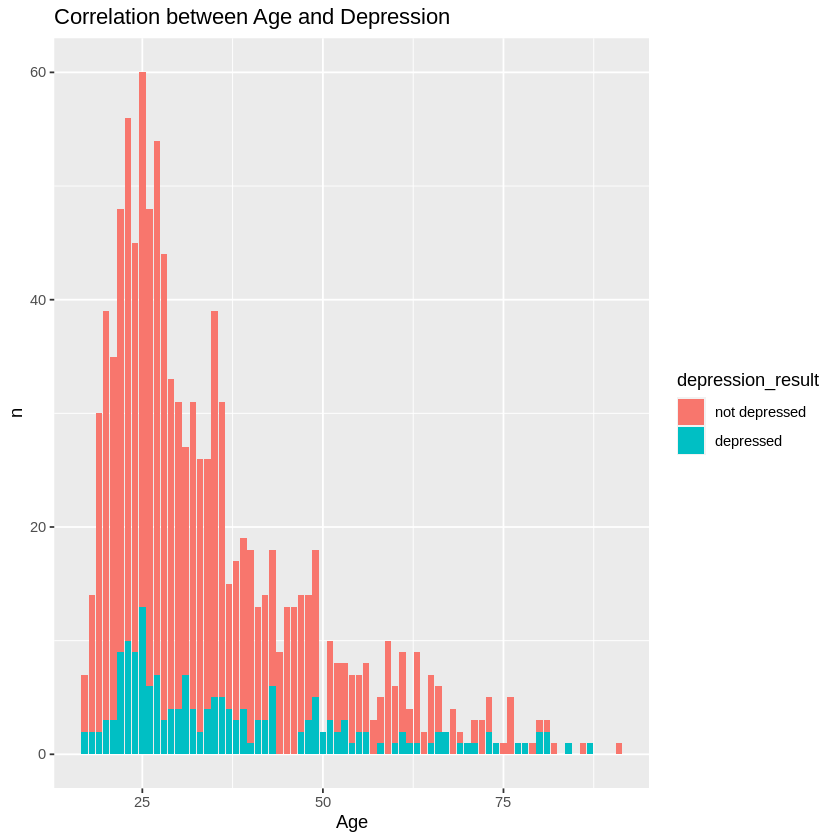

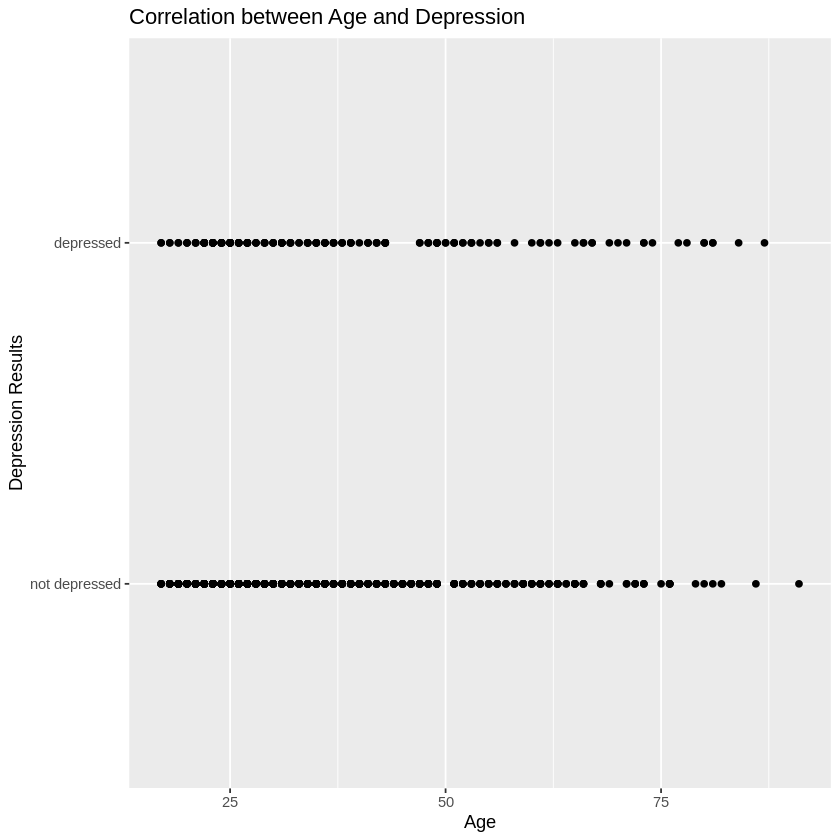

In [5]:
depression_data_plot1 <- depression_train |>
    ggplot(aes(x = Age)) +
    geom_bar(aes(fill = depression_result)) +
    labs(x = "Age", y = "n") +
    ggtitle("Correlation between Age and Depression")

depression_data_plot1

depression_data_plot <- depression_train |>
    ggplot(aes(x = Age, y = depression_result)) +
    geom_point() +
    labs(x = "Age", y = "Depression Results") +
    ggtitle("Correlation between Age and Depression")
depression_data_plot

In [6]:
depression_data_summary

depression_result,mean_sex,mean_age,mean_married,mean_number_children,mean_total_members,mean_assets,mean_expenses,n
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
not depressed,1,33.95633,1,3,5,88.03465,10.04336,893
depressed,1,38.09551,1,3,5,88.95443,10.03475,178


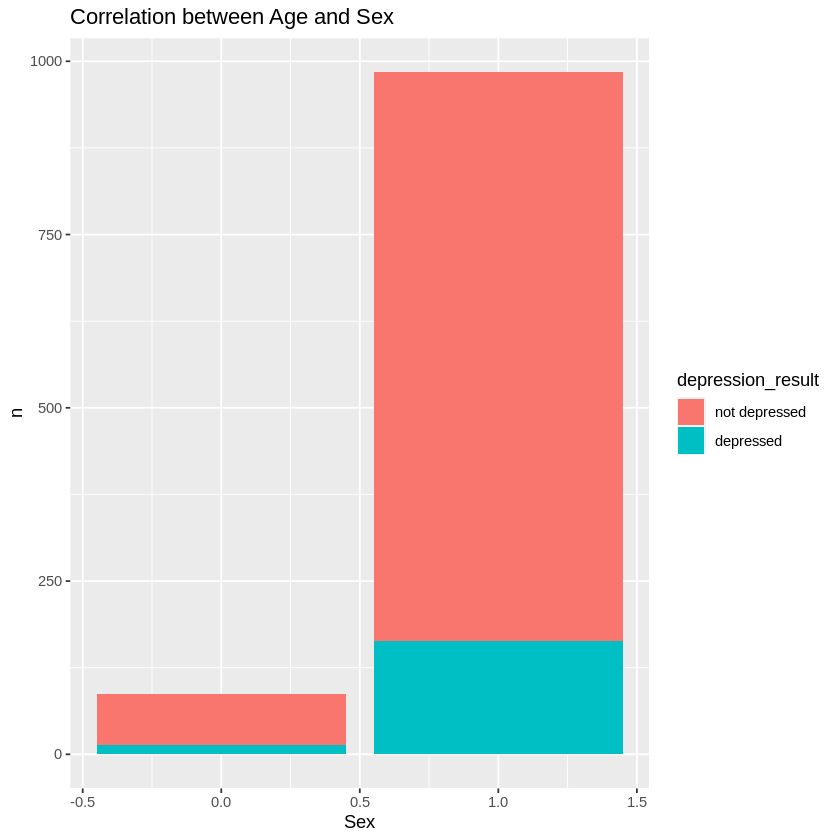

In [7]:
depression_data_plot2 <- depression_train |>
    ggplot(aes(x = sex)) +
    geom_bar(aes(fill = depression_result)) +
    labs(x = "Sex", y = "n") +
    ggtitle("Correlation between Depression and Sex")

depression_data_plot2

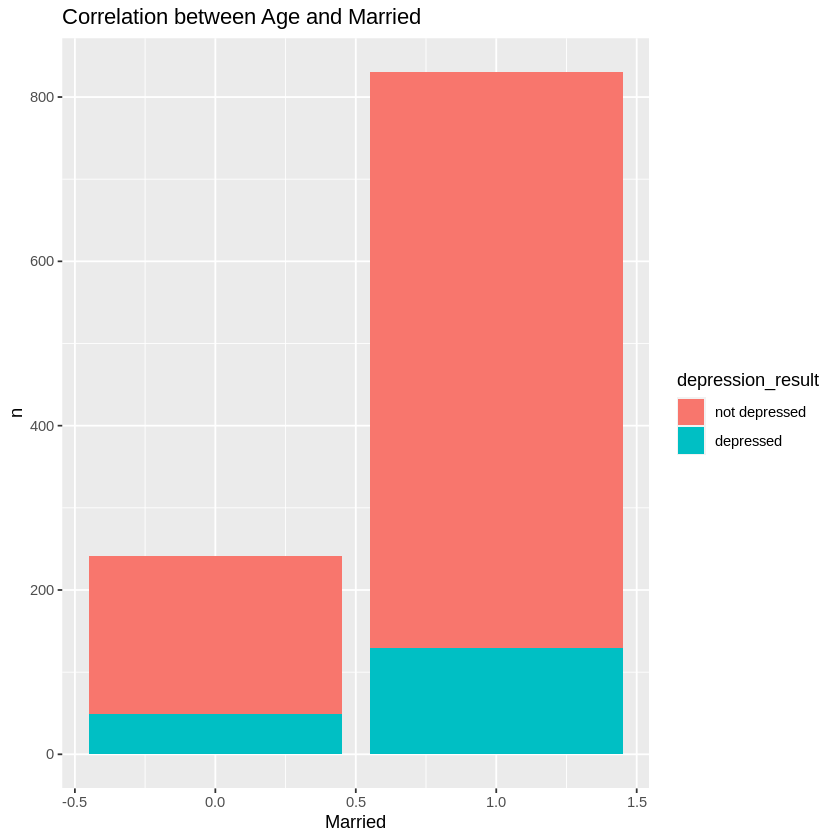

In [8]:
depression_data_plot3 <- depression_train |>
    ggplot(aes(x = Married)) +
    geom_bar(aes(fill = depression_result)) +
    labs(x = "Married", y = "n") +
    ggtitle("Correlation between Depression and Married")

depression_data_plot3

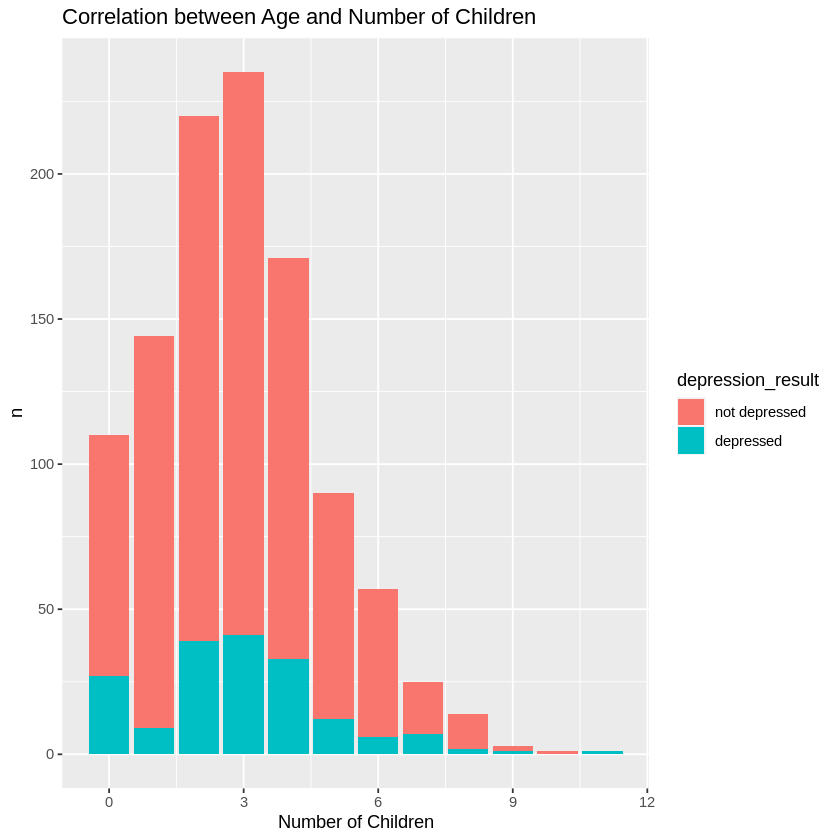

In [9]:
depression_data_plot4 <- depression_train |>
    ggplot(aes(x = Number_children)) +
    geom_bar(aes(fill = depression_result)) +
    labs(x = "Number of Children", y = "n") +
    ggtitle("Correlation between Depression and Number of Children")

depression_data_plot4

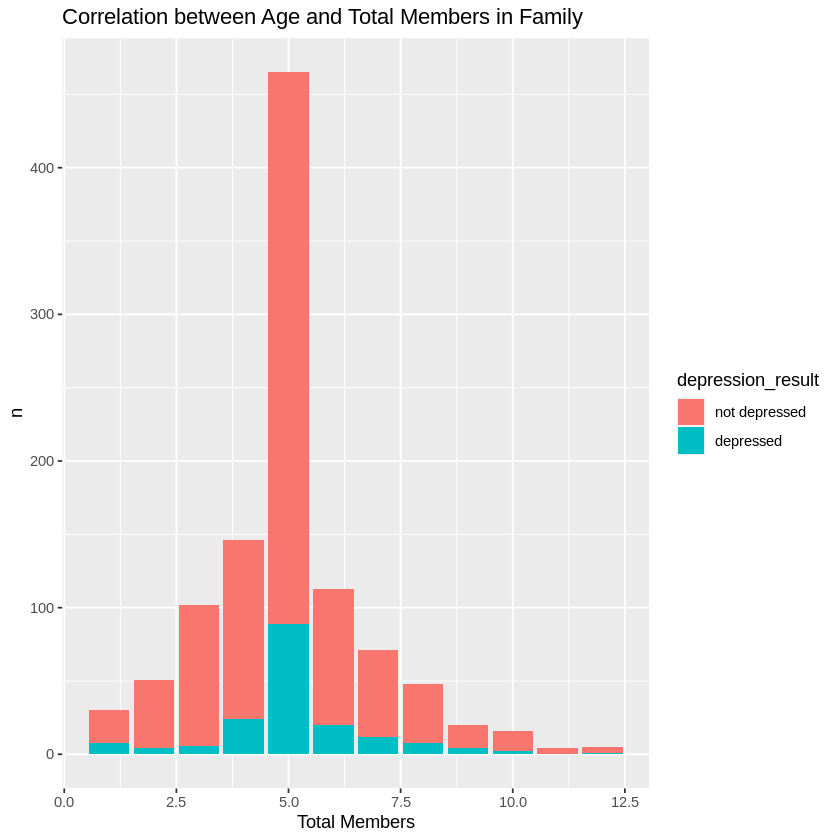

In [10]:
depression_data_plot5 <- depression_train |>
    ggplot(aes(x = total_members)) +
    geom_bar(aes(fill = depression_result)) +
    labs(x = "Total Members", y = "n") +
    ggtitle("Correlation between Depression and Total Members in Family")

depression_data_plot5

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



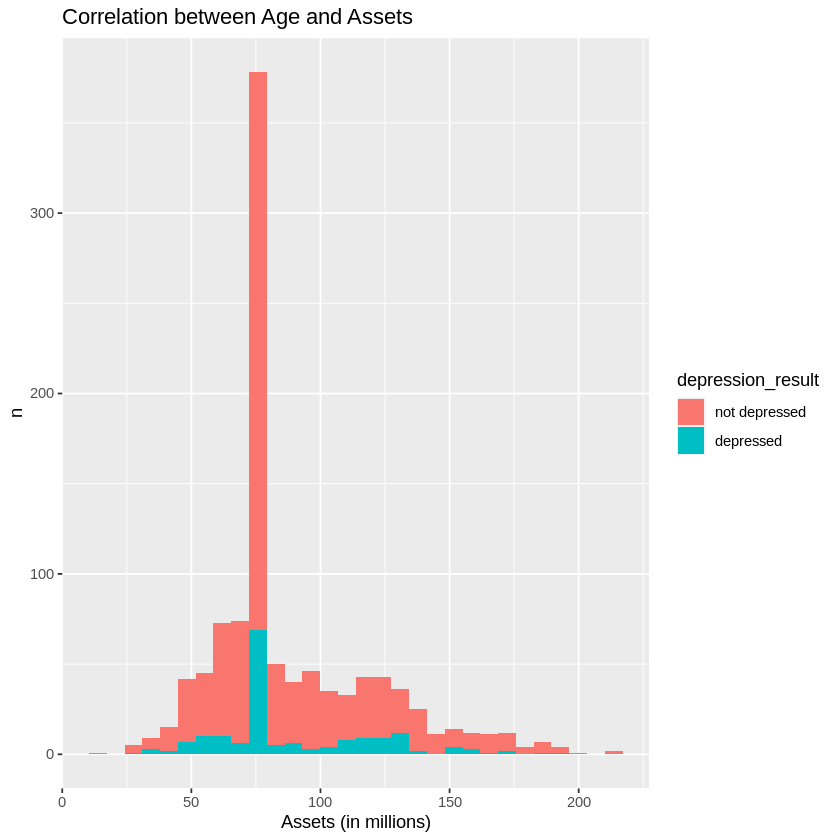

In [11]:
depression_data_plot6 <- depression_train |>
    ggplot(aes(x = assets)) +
    geom_histogram(aes(fill = depression_result)) +
    labs(x = "Assets (in millions)", y = "n") +
    ggtitle("Correlation between Age and Assets")

depression_data_plot6

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



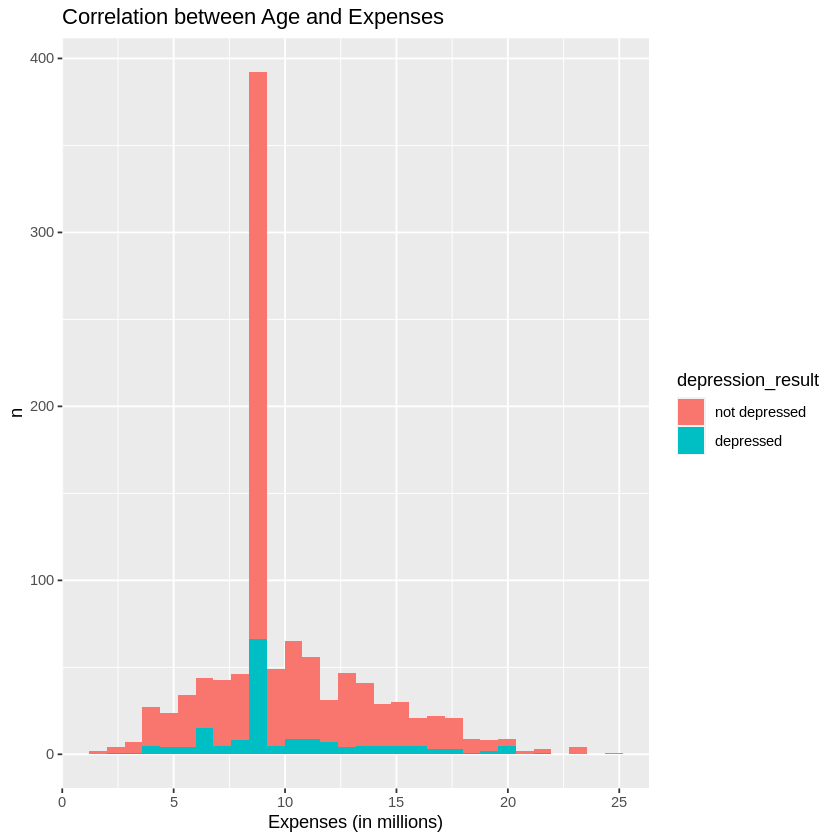

In [12]:
depression_data_plot7 <- depression_train |>
    ggplot(aes(x = expenses)) +
    geom_histogram(aes(fill = depression_result)) +
    labs(x = "Expenses (in millions)", y = "n") +
    ggtitle("Correlation between Depression and Expenses")

depression_data_plot7

### Methods

For our analysis, we will be using the following columns from the dataset:
- sex
- Age
- married
- Number_children
- total_members
- gained_asset
- durable_asset
- save_asset
- living_expenses
- other_expenses
- depressed

To analyze the total assets, we will be using **mutate** function to add the columns *gained_asset*, *durable_asset*, and *save_asset* into one *asset* column.
To analyze the total expenses, we will be using **mutate** function to add the columns *living_expenses* and *other_expenses* into one *expenses* column.

To conduct our data analysis, we will clean our data so it only contains the columns we need, split our dataset into training and testing data, scale our data, use the 5 fold cross-validation technique to find our best k-nearest neighbors, then train our classification model so that it can predict whether someone is depress or not more accurately.

To visualize our results, we will create **scatterplots** of the scaled data using each *predictor* (variable) and colour the points based on whether they are predicted to be depressed or not. If our scatterplot is too difficult to read due to us having too many *predictors*, we will create scatterplots using only 2 predictors and see which ones show the best correlation for predicting depression.

### Expected outcomes and significance

We are expecting to predict whether someone from a rural area is likely to be depressed or not by specifying the factors listed above as predictors into the model.

We expect depression to be more common in women based on statistics from various news articles, people with a lower income to be more at-risk of depression, elderlies with very few family members, and teens with lots of family members, because they may have more pressure or be compared to their siblings a lot.

*Impacts of our findings:*
We are hoping that our findings can help others predict if their family or friends living in rural areas are likely to be depressed, and that our findings can help others in the medical field discover preventive measures that the most vulnerable population could take to reduce the risk of depression (if there are any). We are also hoping that our findings can enchance clinical support to the at-risk population by looking at the roots of why they are more likely to become depressed.

*Future questions our model could reach to:*
- What are some actions that could be taken in general to avoid depression and improve well-being (in relation to each column that are found closely correlated with mental illness)?
- How could the government increase accessibility of the rural community to medical support, especially patients diagnosed with depression?

# Data Analysis

In [13]:
set.seed(1)

# Reading and cleaning the data
depression_data <- read_csv("https://raw.githubusercontent.com/DonaldKLee/DSCI-100-Group-Project/main/data/b_depressed.csv") |>
    mutate(
        depression_result = as_factor(ifelse(depressed>0, "depressed", "not depressed")),
        assets=(gained_asset+durable_asset+save_asset),
        expenses=(living_expenses+other_expenses+farm_expenses)) |>
    select(sex, Age, Married, Number_children, total_members, assets, expenses, depression_result)

# Getting training data
depression_data_split <- initial_split(depression_data, prop=0.75, strata = depression_result)

depression_train <- training(depression_data_split)
depression_test <- testing(depression_data_split)

Rows: 1429 Columns: 23
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (23): Survey_id, Ville_id, sex, Age, Married, Number_children, education...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [14]:
install.packages("themis")
library(themis)


also installing the dependencies ‘RANN’, ‘ROSE’


Warning message in install.packages("themis"):
“installation of package ‘ROSE’ had non-zero exit status”
Warning message in install.packages("themis"):
“installation of package ‘themis’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



ERROR: Error in library(themis): there is no package called ‘themis’


In [ ]:
# Training our classifier

# Getting proportions
proportions <- depression_train |>
                      group_by(depression_result) |>
                      summarize(n = n()) |>
                      mutate(percent = 100*n/nrow(depression_train))

# proportions

# Creating a recipe
depression_recipe <- recipe(depression_result ~ ., data = depression_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors()) |>
    step_upsample(depression_result, over_ratio = 1) |>
    prep()

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
    set_engine("kknn") |>
    set_mode("classification")

knn_fit <- workflow() |>
    add_recipe(depression_recipe) |>
    add_model(knn_spec) |>
    fit(data = depression_train)

depression_test_predictions <- predict(knn_fit, depression_test) |>
    bind_cols(depression_test)

depression_test_predictions

## Computing the accuracy of our model

In [ ]:
depression_test_predictions |>
    metrics(truth = depression_result, estimate = .pred_class) |>
    filter(.metric == "accuracy") |>
    select(.estimate) |>
    pull()

confusion <- depression_test_predictions |>
             conf_mat(truth = depression_result, estimate = .pred_class)
confusion

## Tuning our Classifier

In [ ]:
depression_vfold <- vfold_cv(depression_train, v = 5, strata = depression_result)


# Creating a recipe
depression_recipe <- recipe(depression_result ~ ., data = depression_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors()) |>
    step_upsample(depression_result, over_ratio = 1) |>
    prep()


knn_fit <- workflow() |>
    add_recipe(depression_recipe) |>
    add_model(knn_spec) |>
    fit_resamples(resamples = depression_vfold)

knn_fit |>
    collect_metrics()


## Finding the best number of neighbours K

In [ ]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

k_vals <- tibble(neighbors = seq(from = 1, to = 20, by = 1))

knn_results <- workflow() |>
    add_recipe(depression_recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples = depression_vfold, grid = k_vals) |>
    collect_metrics()

accuracies <- knn_results |>
  filter(.metric == "accuracy")

best_k <- accuracies |>
    arrange(desc(mean)) |>
    head(1) |>
    select(neighbors) |>
    pull()
    
best_k

accuracy_vs_k <- accuracies |>
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbours", y = "Accuracy Estimate") +
    theme(text = element_text(size = 12))

accuracy_vs_k

## Retraining our Classifier with the best k value

In [ ]:
# Creating a recipe
depression_recipe <- recipe(depression_result ~ ., data = depression_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors()) |>
    step_upsample(depression_result, over_ratio = 1) |>
    prep()

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
    set_engine("kknn") |>
    set_mode("classification")

knn_fit <- workflow() |>
    add_recipe(depression_recipe) |>
    add_model(knn_spec) |>
    fit(data = depression_train)

depression_test_predictions <- predict(knn_fit, depression_test) |>
    bind_cols(depression_test)

depression_test_predictions

## Recomputing the accuracy of our model

In [ ]:
depression_test_predictions |>
    metrics(truth = depression_result, estimate = .pred_class) |>
    filter(.metric == "accuracy") |>
    select(.estimate) |>
    pull()

confusion <- depression_test_predictions |>
             conf_mat(truth = depression_result, estimate = .pred_class)
confusion